In [31]:
import pandas as pd

df_original = pd.read_csv("../src/taxipred/data/taxi_trip_pricing.csv")
df_original.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [33]:
df_original.describe().T

,count,mean,std,min,25%,50%,75%,max
Trip_Distance_km,950.0,27.070547,19.905300,1.2300,12.63250,25.8300,38.40500,146.067047
Passenger_Count,950.0,2.476842,1.102249,1.0000,1.25000,2.0000,3.00000,4.000000
Base_Fare,950.0,3.502989,0.870162,2.0100,2.73000,3.5200,4.26000,5.000000
Per_Km_Rate,950.0,1.233316,0.429816,0.5000,0.86000,1.2200,1.61000,2.000000
Per_Minute_Rate,950.0,0.292916,0.115592,0.1000,0.19000,0.2900,0.39000,0.500000
Trip_Duration_Minutes,950.0,62.118116,32.154406,5.0100,35.88250,61.8600,89.05500,119.840000
Trip_Price,951.0,56.874773,40.469791,6.1269,33.74265,50.0745,69.09935,332.043689


In [34]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [35]:
df = df_original.copy()
int_columns = ['Trip_Distance_km', 'Passenger_Count', 'Base_Fare', 'Per_Km_Rate','Per_Minute_Rate', 'Trip_Duration_Minutes']

for col in int_columns:
    if col == "Trip_Duration_Minutes" or col == "Per_Km_Rate" or col == "Trip_Distance_km" or col == "Passenger_Count": 
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mean())
df["Time_of_Day"] = df["Time_of_Day"].fillna("Afternoon")
df["Day_of_Week"] = df["Day_of_Week"].fillna("Weekday")
df["Traffic_Conditions"] = df["Traffic_Conditions"].fillna("Low") #stor öking, 363 mot 412!  
df["Weather"] = df["Weather"].fillna("Clear")
df.describe().T - df_original.describe().T

,count,mean,std,min,25%,50%,75%,max
Trip_Distance_km,50.0,-0.062027,-0.502639,0.0,0.4750,0.000000,-0.6225,0.0
Passenger_Count,50.0,-0.023842,-0.022918,0.0,0.7500,0.000000,0.0000,0.0
Base_Fare,50.0,0.000000,-0.022055,0.0,0.0400,-0.017011,-0.0575,0.0
Per_Km_Rate,50.0,-0.000666,-0.010884,0.0,0.0100,0.000000,-0.0300,0.0
Per_Minute_Rate,50.0,0.000000,-0.002930,0.0,0.0075,0.002916,-0.0075,0.0
Trip_Duration_Minutes,50.0,-0.012906,-0.814943,0.0,1.2250,0.000000,-1.2800,0.0
Trip_Price,0.0,0.000000,0.000000,0.0,0.0000,0.000000,0.0000,0.0


In [36]:
df_target = df[df["Trip_Price"].isna()]
df = df[df["Trip_Price"].notna()]
len(df), len(df_target)

(951, 49)

In [37]:
Q1, Q3 = df["Trip_Distance_km"].quantile(0.25), df["Trip_Distance_km"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

print(Q1, Q3)

df = df[(df["Trip_Distance_km"] >= lower_bound) & (df["Trip_Distance_km"] <= upper_bound)]


13.129999999999999 37.83


In [38]:
Q1, Q3 = df["Trip_Price"].quantile(0.25), df["Trip_Price"].quantile(0.75)
# Q1, Q3 = 33.39, 67.06
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)
print(Q1, Q3)

df = df[(df["Trip_Price"] >= lower_bound) & (df["Trip_Price"] <= upper_bound)]

33.3907 67.0695


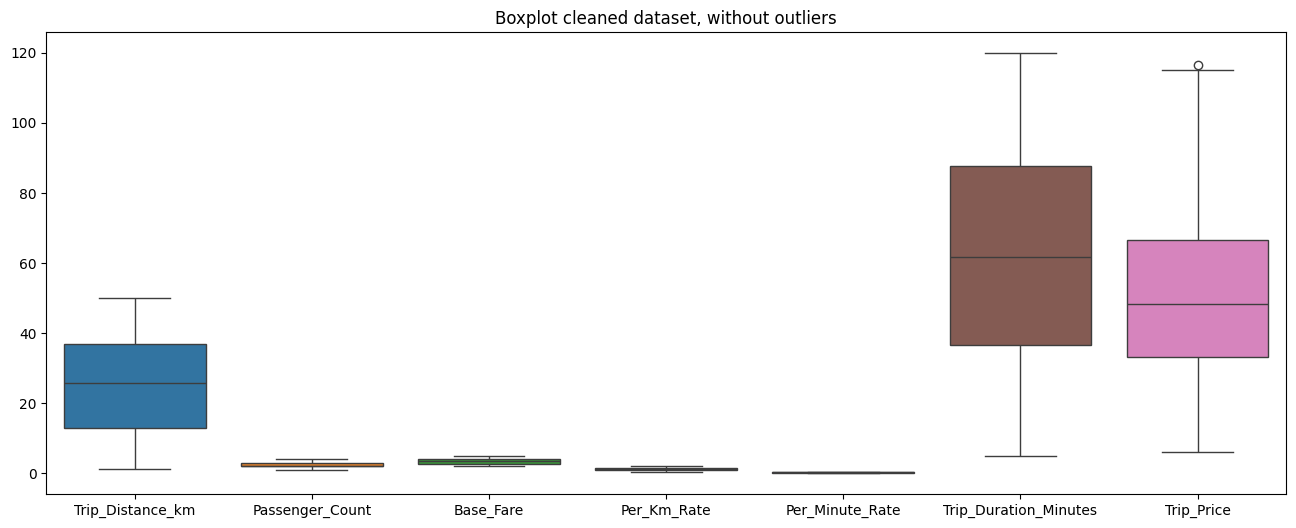

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16,6))
sns.boxplot(data=df, ax=ax)
ax.set_title("Boxplot cleaned dataset, without outliers");

In [40]:
len(df), len(df_target)


(923, 49)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 923 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       923 non-null    float64
 1   Time_of_Day            923 non-null    object 
 2   Day_of_Week            923 non-null    object 
 3   Passenger_Count        923 non-null    float64
 4   Traffic_Conditions     923 non-null    object 
 5   Weather                923 non-null    object 
 6   Base_Fare              923 non-null    float64
 7   Per_Km_Rate            923 non-null    float64
 8   Per_Minute_Rate        923 non-null    float64
 9   Trip_Duration_Minutes  923 non-null    float64
 10  Trip_Price             923 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.5+ KB


<Axes: xlabel='Weather'>

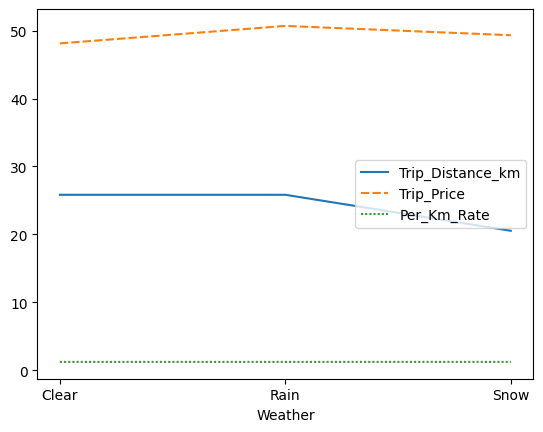

In [42]:
import seaborn as sns
to_plot = df.groupby("Weather")[["Trip_Distance_km", "Trip_Price", "Per_Km_Rate"]].median()
sns.lineplot(to_plot)

<Axes: xlabel='Day_of_Week'>

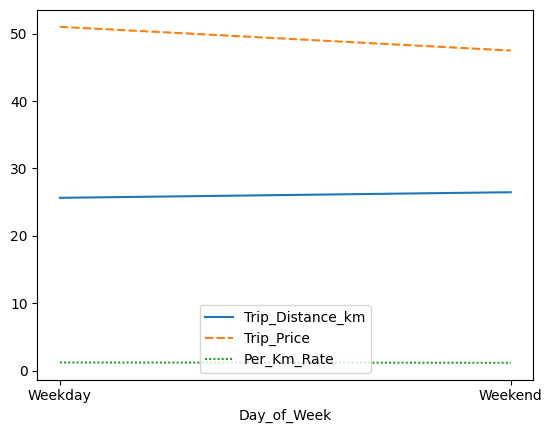

In [43]:
to_plot = df_original.groupby("Day_of_Week")[["Trip_Distance_km", "Trip_Price","Per_Km_Rate"]].median()
sns.lineplot(to_plot)

<Axes: xlabel='Traffic_Conditions'>

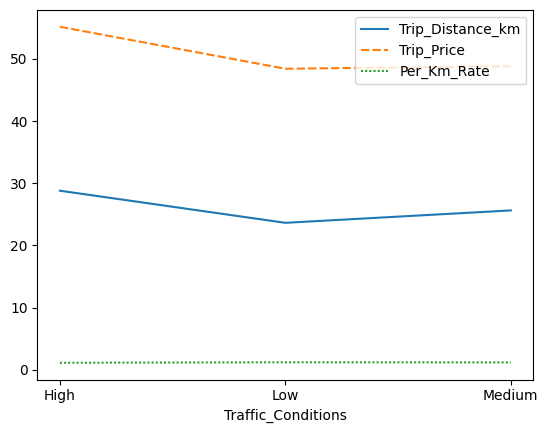

In [47]:
to_plot = df_original.groupby("Traffic_Conditions")[["Trip_Distance_km", "Trip_Price","Per_Km_Rate"]].median()
sns.lineplot(to_plot)